In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
train_full = pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv',index_col=0,parse_dates=['date'])

In [3]:
train_full

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...
26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004


In [4]:
import matplotlib.pyplot as plt

In [5]:
ss = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv', index_col=0)
ss

,num_sold
row_id,
26298,100
26299,100
26300,100
26301,100
26302,100
...,...
32863,100
32864,100
32865,100


In [6]:
test_full = pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv',index_col=0,parse_dates=['date'])

In [7]:
test_full

,date,country,store,product
row_id,,,,
26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...
32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug


In [8]:
z = train_full.query('country == "Finland" and store == "KaggleMart" and product == "Kaggle Mug"')
y = train_full.query('country == "Finland" and store == "KaggleRama" and product == "Kaggle Mug"')

In [9]:
z

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
18,2015-01-02,Finland,KaggleMart,Kaggle Mug,318
36,2015-01-03,Finland,KaggleMart,Kaggle Mug,360
54,2015-01-04,Finland,KaggleMart,Kaggle Mug,332
72,2015-01-05,Finland,KaggleMart,Kaggle Mug,243
...,...,...,...,...,...
26208,2018-12-27,Finland,KaggleMart,Kaggle Mug,414
26226,2018-12-28,Finland,KaggleMart,Kaggle Mug,499
26244,2018-12-29,Finland,KaggleMart,Kaggle Mug,774


In [10]:
y

,date,country,store,product,num_sold
row_id,,,,,
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
21,2015-01-02,Finland,KaggleRama,Kaggle Mug,544
39,2015-01-03,Finland,KaggleRama,Kaggle Mug,579
57,2015-01-04,Finland,KaggleRama,Kaggle Mug,582
75,2015-01-05,Finland,KaggleRama,Kaggle Mug,423
...,...,...,...,...,...
26211,2018-12-27,Finland,KaggleRama,Kaggle Mug,652
26229,2018-12-28,Finland,KaggleRama,Kaggle Mug,895
26247,2018-12-29,Finland,KaggleRama,Kaggle Mug,1398


In [11]:
train_full['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [12]:
train_full['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [13]:
t = test_full.query('country == "Finland" and store == "KaggleMart" and product == "Kaggle Mug"')

Splits only make sense on the time axis. Random split won't do -- neighbouring rows have a tendency to be similar. The validation split should have similar stats to test split. So let's see test split stats.

In [14]:
train_full.country.value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [15]:
cats = ['country', 'store', 'product']

for cat in cats:
    print(train_full[cat].value_counts())

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64
KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64
Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64


Generalization: Each day - Each country - Each retailer - Each Product -- Num sold in that group. That's the dataset. Let's test that once more.

In [16]:
gb = train_full.groupby(train_full.columns[:-1].tolist())
assert gb.size().sum() == train_full.shape[0]

Theory: Since the products are identical, their performance should be identical as well. (If true, this competition is not going to be interesting.

Fix retailer, product. 
x axis time, y axis num sold. Color country.

In [17]:
# proda = train_full.query('country == "Finland" and store == "KaggleMart" and product == "Kaggle Mug"')
# prodb = train_full.query('country == "Finland" and store == "KaggleMart" and product == "Kaggle Mug"')
gb = train_full.groupby(['country','store','product'])
proda = gb.get_group(('Finland','KaggleMart','Kaggle Mug'))
prodb = gb.get_group(('Sweden','KaggleMart','Kaggle Mug'))

Seems like in this particular case, that is true. 

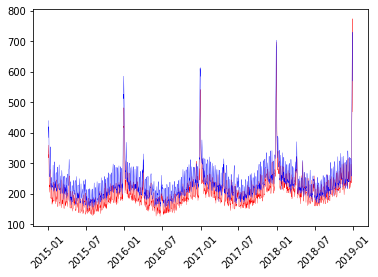

In [18]:
import seaborn as sns

plt.plot(proda.date, proda.num_sold, c='r', linewidth=.3)
plt.plot(prodb.date, prodb.num_sold, c='b', linewidth=.3)
plt.xticks(rotation=45)
plt.show()

Let's make our split. We want it to be as similar to test set as possible. Since we are cutting in 'date' column, we will take similar number of rows both test and valid.

I can see peaks at regular intervals. I assume test set also has them.  
Theory: Test set has at most +-%5 date range of a single period (between two adjacent peaks).  
Let's first determine number of days between peaks  

In [19]:
ts = proda.num_sold

In [20]:
from scipy.signal import find_peaks

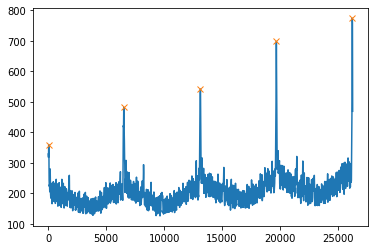

In [21]:
peaks, _ = find_peaks(ts, distance=360)
plt.plot(ts)
plt.plot(ts.index[peaks], ts.iloc[peaks], "x")
plt.show()

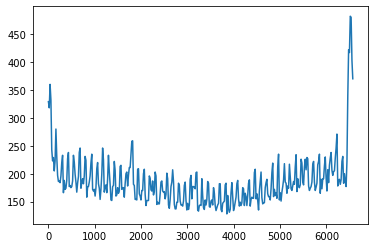

In [22]:
plt.plot(ts.iloc[:366]) # Once a year.

In [28]:
train, valid = train_full.iloc[:-360], train_full.iloc[-360:]

<AxesSubplot:xlabel='row_id'>

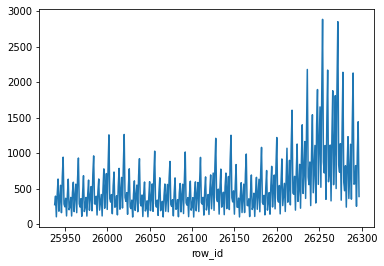

In [31]:
valid.num_sold.plot()